# Hackathon Stat

This project illustrates the course LEPL1109 with an industrial application of statistics. You will analyse the capacity of solar production of electricity located in the French cities of Caen and Tours.
The file 'radiation.csv' contains 3 columns 
DATE           : YYYYMMDD,
Caen and Tours : the daily solar radiation in W/m2 measured in the 2 cities. 
Notice that data for some days are not reported due to failure of measurement system.

## Report content

•	You have to fill in this  jupyter notebook downloadable on the moodle website of the course

•	Grades are granted to the members whose names are in the Jupyter notebook. If your name doesn’t appear on the top of the notebook, you’ll get a 0, even though you are in a group on Moodle.

•	The jupyter notebook must be compiled with printed results and next submitted via moodle. The absence of compiled results (or non-printed values) leads to a lower grade.

## Report submission

•	The deadline for submission is reported on the moodle website. Submission after the deadline will not be accepted.

•	To submit your report, go to the section “APP” on Moodle and the subsection “Soumission du rapport”. You can upload your work there. Once you are sure that it is your final version, click the button “Envoyer le devoir”. It is important that you don’t forget to click on this button ! 

•	Reports that have not been uploaded through Moodle will not be corrected.

## Names and Noma of participants:

Part. 1: Lebras Floriane         (35022100)

Part. 2: Martin Antoine           (86692100)

Part. 3: Dallemagne Brieuc        (77122100)

Part. 4: De Vleeschouwver Nora    (48602100)

Part. 5: Debelle Thomas           (30002100)

Part. 6: Orékhoff Alexandre       (54552100)

---
## 1. Energy calculation and basic statistics

Compute the daily energy in WH per square meter of solar panel. For this purpose you use the datasets reporting the solar irradation measure in Tours and Tours (source https://www.ecad.eu/). The irradiation is measured in W/m2 per day. You will use the formula:

C = E_Sol x 24 x P_cr x f_perf

where  

C is the electricity produced in WH/m2 for a day

E_sol is the daily solar radiation in W/m2 

P_cr is the peak power coefficient, set here to  0.18 (monocristal silicium)

f_perf depends upon the system, set here to 0.75.

Remark:

1 W = 1 J/sec

1 WH  is 1W x 3600sec = 3600J

energy/m2 = E_sol * 24 * 3600 J/m2 = E_sol * 24 WH/m2

---
1.1. Start by computing the daily energy in WH produced by a 1m2 solar panel

a. Plot time-series of solar electric production in Caen and Tours from 1974 to 2023. Comment the evolution.

b. Plot boxplots of daily productions for both cities. Comment the box plot.

c. Remove outliers using the interquartile range. 

d. Plot an histogram of daily electricity production, after removal of outliers.

Watchout: remove all days for which a outlier is observed in Caen **or** Tours to keep the same number of observations.


In [ ]:
### prérequis Import ###

import csv
import scipy as sp
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.metrics import mean_absolute_error as mae 

In [11]:
data_pd = pd.read_csv("Radiation.csv")
data_pd = data_pd.drop(columns="Unnamed: 0")
Caen = data_pd["Caen"].to_numpy()
Tours = data_pd["Tours"].to_numpy()
Date = data_pd["DATE"].to_numpy()
Index = np.arange(0, len(Date), 1)
print(Date, Index)


[19740101 19740102 19740103 ... 20230329 20230330 20230331] [    0     1     2 ... 17786 17787 17788]


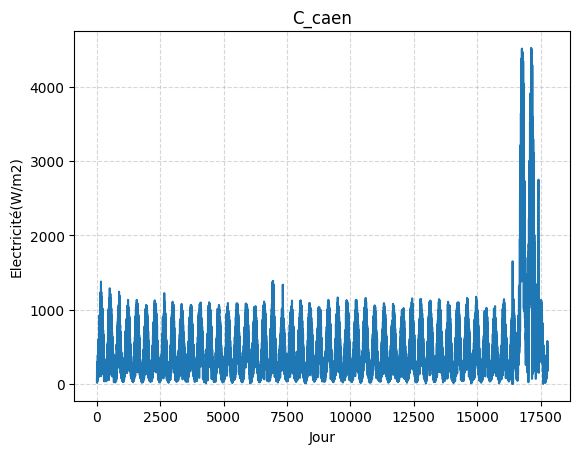

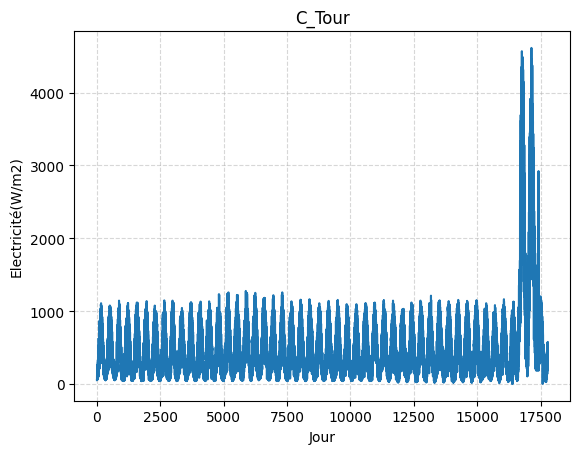

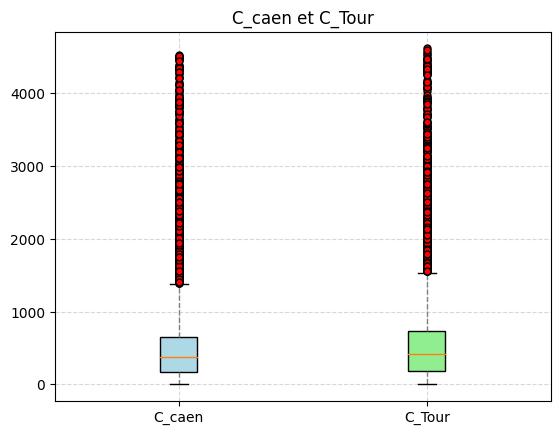

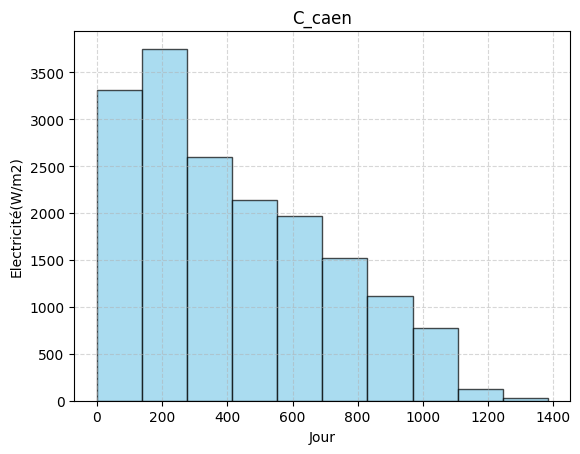

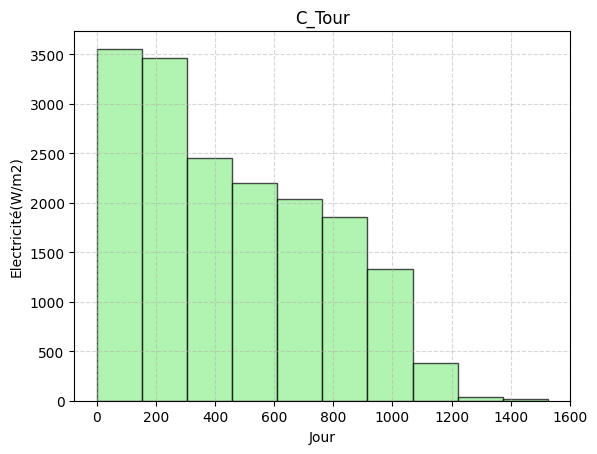

In [12]:
### code 1.1 ###

def time_to_year(dataset):
    dataset = pd.read_csv("Radiation.csv")
    dataset = dataset.drop(columns="Unnamed: 0")
    dataset["DATE"] = pd.to_datetime(dataset["DATE"], format="%Y%m%d")
    dataset["DATE"] = dataset["DATE"].dt.strftime("%Y") ## Make a copy if you want to keep the most interesting data
    return dataset

def time_to_month(dataset):
    dataset = pd.read_csv("Radiation.csv")
    dataset = dataset.drop(columns="Unnamed: 0")
    dataset["DATE"] = pd.to_datetime(dataset["DATE"], format="%Y%m%d")
    dataset["DATE"] = dataset["DATE"].dt.strftime("%m") ## Make a copy if you want to keep the most interesting data
    return dataset


def box_plot(data1, data2, title, name1, name2):
    """
    description:
        plot a box plot of two data

    args:
        data1: list of data
        data2: list of data
        title: title of the plot
        name1: name of the first data
        name2: name of the second data

    return:
        None
    """
    
    plt.figure()
    bp = plt.boxplot([data1, data2], patch_artist=True, labels=[name1, name2])
    
    colors = ['lightblue', 'lightgreen']
    for box, color in zip(bp['boxes'], colors):
        box.set(facecolor=color)
    
    for whisker in bp['whiskers']:
        whisker.set(color='gray', linestyle='--', linewidth=1)
    
    for flier in bp['fliers']:
        flier.set(marker='o', markersize=5, markerfacecolor='red')
    
    plt.title(title)
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.show()


def plot_data(data,title,Xname,Yname):
    """
    description:
        plot a data
    
    args:
        data: list of data
        title: title of the plot
        Xname: name of the X axis
        Yname: name of the Y axis

    return:
        None
    """
    
    plt.figure()
    plt.plot(data)
    plt.title(title)
    plt.xlabel(Xname)
    plt.ylabel(Yname)
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.show()

def remove_outliers_interquartile(lst1,lst2,Date,Index):
    """
    description:
        remove outliers from two lists of data by using the interquartile method

    args:
        lst1: np.array of data1
        lst2: np.array of data2

    return:
        new_lst1: list of data1 without outliers
        new_lst2: list of data2 without outliers
        new_date: list of dates without outliers
        new_index: list of indexes of the data without outliers
    """
    q1 = np.percentile(lst1, 25)
    q3 = np.percentile(lst1, 75)
    iqr = q3 - q1
    Q1 = np.percentile(lst2,25)
    Q3 = np.percentile(lst2,75)
    IQR = Q3 - Q1
    new_lst1 = list()
    new_lst2 = list()
    new_date = list()
    new_index = list()
    for i in range(len(lst1)):
        if lst1[i] > q1 - 1.5*iqr and lst1[i] < q3 + 1.5*iqr and lst2[i] > Q1 - 1.5*IQR and lst2[i] < Q3 + 1.5*IQR:
            new_lst1.append(lst1[i])
            new_lst2.append(lst2[i])
            new_date.append(Date[i])
            new_index.append(Index[i])
    return [new_lst1,new_lst2,new_date,new_index]

def plot_histogram(data, title, x_label, y_label, color='skyblue'):
    """
    description:
        plot an histogram of a data
    
    args:
        data: list of data
        title: title of the plot
        x_label: name of the X axis
        y_label: name of the Y axis
        color: color of the histogram
    
    Return: 
        None
    """
    
    plt.figure()
    plt.hist(data, color=color, edgecolor='black', alpha=0.7)
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.grid(True, linestyle='--', alpha=0.5)

    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)

    plt.show()

P_cr = 0.18
f_perf = 0.75
E_caen = Caen
E_Tour = Tours
C_caen = Caen*24*P_cr*f_perf
C_Tour = Tours*24*P_cr*f_perf


plot_data(C_caen,'C_caen','Jour','Electricité(W/m2)')
plot_data(C_Tour,'C_Tour','Jour','Electricité(W/m2)')

box_plot(C_caen,C_Tour,'C_caen et C_Tour','C_caen','C_Tour')

res = remove_outliers_interquartile(C_caen,C_Tour,Date,Index)
C_caen = res[0]
C_Tour = res[1]
Date = res[2]
Index = res[3]

plot_histogram(C_caen,'C_caen','Jour','Electricité(W/m2)')
plot_histogram(C_Tour,'C_Tour','Jour','Electricité(W/m2)',color='lightgreen')



---
1.2. We want to compute monthly statistics of electricity solar production. Calculate for each city and for each month: 

1) the average daily production of electricity in Wh/m2

2) the median daily production of electricity in Wh/m2

3) the standard deviation daily production of electricity in Wh/m2

4) the 5% percentile of daily production of electricity in Wh/m2

5) the 95% percentile of daily production of electricity in Wh/m2

Report the results in one or two tables. 

Compare and comment these statistics!

Caen
Month:  Average  Median  Standard dev 	 5 quar  95 quartile
01:  45.33183 	 38 	 34.91446 	 13.00 	 94.00
02:  79.47226 	 69.0 	 59.76836 	 22.00 	 148.75
03:  137.92177 	 115.0 	 121.47833 	 39.65 	 336.55
04:  199.72313 	 181.0 	 151.36754 	 63.00 	 288.55
05:  240.75498 	 223.0 	 178.84301 	 72.00 	 346.75
06:  255.89390 	 238.0 	 168.82122 	 93.00 	 376.90
07:  251.70501 	 232.0 	 166.41785 	 98.85 	 346.15
08:  214.75068 	 201.0 	 132.62439 	 88.00 	 304.00
09:  160.86498 	 147 	 112.23346 	 57.00 	 239.10
10:  94.80896 	 84.0 	 71.51316 	 28.00 	 163.00
11:  53.40304 	 48 	 38.49468 	 15.00 	 97.00
12:  35.32695 	 31.0 	 25.81290 	 9.00 	 64.00
_______________
Tours
Month:  Average  Median  Standard dev 	 5 quar  95 quartile
01:  48.80697 	 38 	 41.55503 	 14.00 	 102.60
02:  86.45875 	 74.0 	 66.55576 	 22.00 	 166.00
03:  150.53846 	 132.0 	 126.01678 	 43.00 	 282.70
04:  213.13605 	 195.0 	 158.02963 	 64.00 	 303.00
05:  248.77158 	 231.0 	 176.57806 	 77.25 	 356.50
06

<AxesSubplot: xlabel='Year'>

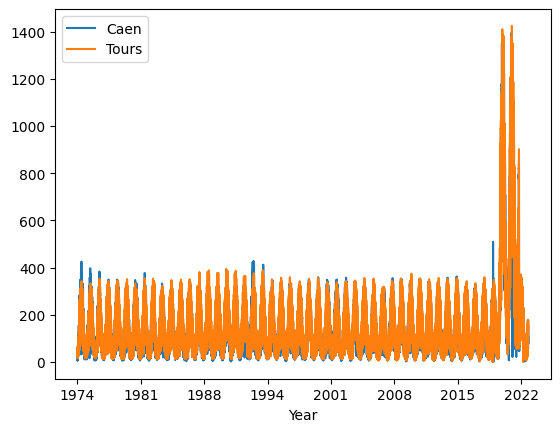

In [13]:
### code 1.2 ###

### Refaire avec les mois

def q2_month(dataset, month):
    """Code that answer the question 1.2
    description:
        Compute the average, median, standard deviation, 5 percentile and 95 percentile of a dataset

    Args:
        dataset (Arraylist): An arraylist with the data of the daily production of electricity

    Returns:
        tuple: Return a tuple of data like: (average, median, standard deviation, 5 percentile, 95 percentile)
    """
    dataset_av = sum(dataset)/len(dataset) # Average / mean

    ### Comput median
    dataset_sorted = sorted(dataset)
    if(len(dataset)%2 == 0):
        dataset_median = (dataset_sorted[len(dataset)//2] + dataset_sorted[len(dataset)//2])/2
    else:
        dataset_median = dataset_sorted[len(dataset)//2]

    dataset_std = np.std(dataset)

    dataset_5 = np.percentile(dataset, 5)
    dataset_95 = np.percentile(dataset, 95)
        
    print(f"{month}:  {dataset_av:.5f} \t {dataset_median} \t {dataset_std:.5f} \t {dataset_5:.2f} \t {dataset_95:.2f}")
    
    return (dataset_av, dataset_median, dataset_std, dataset_5, dataset_95)

def q2(dataset):
    """Answer Q2

    Args:
        dataset (pandas dataframe): a data frame with the data column being the month
    """
    months = ["01", "02", "03", "04", "05", "06", "07", "08", "09", "10", "11", "12"]
    cities = ["Caen", "Tours"]
    dataset = dataset.sort_values(by=["DATE"])
    
    for city in cities:
        print(city)
        print("Month:  Average  Median  Standard dev \t 5 quar  95 quartile")
        for month in months:
            q2_month(dataset[dataset["DATE"] == month][city], month)
        print("_______________")
        
    
month_pd = time_to_month(data_pd.copy())
q2(month_pd)

## How to properly plot date time data with pandas
test = pd.read_csv("Radiation.csv")
test = test.drop(columns="Unnamed: 0")
test["DATE"] = pd.to_datetime(test["DATE"], format="%Y%m%d")
test["DATE"] = test["DATE"].dt.strftime("%Y") ## Make a copy if you want to keep the most interesting data
test.plot(x="DATE", xlabel="Year")




---
## 2. Fit of distributions and hypothesis tests

---
2.1. We focus on the daily production of electricity in April. Retrieve the data for month of April, in Caen and Tours. 

 1) Fit Gamma and normal distributions by log-likelihood maximization to 
    daily production of electricity during April (Caen & Tours).
    
 2) Compute the 4 log-likelihoods and select the best model for each location (justify your answer).
 
 3) Compare on the same plot the empirical, the  gamma and normal pdf (the
    empirical pdf is an histogram of frequencies).
    
 4) Why is there 3 parameters in python for the Gamma pdf whereas there
    is only 2 in the distribution seen during lectures? 

Remark : set floc to -0.001 for the gamma.fit (to avoid troubles in case of null observations)


-9549.38685406591
-9649.520623487704
-9635.883766471161
-9737.796865103604
[142 164 134 ... 149 269 219]


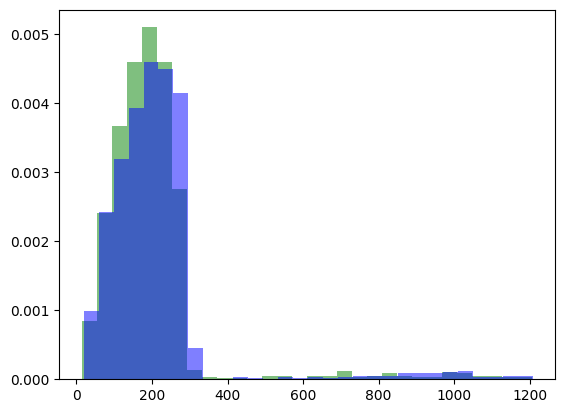

In [23]:
#code here
april_pd = data_pd.copy()
april_pd["DATE"] = pd.to_datetime(april_pd["DATE"], format="%Y%m%d")
april_pd["DATE"] = april_pd["DATE"].dt.strftime("%m")
april_pd = april_pd.loc[april_pd["DATE"] == "04"]

april_Caen, april_Tours = april_pd["Caen"].to_numpy(), april_pd["Tours"].to_numpy()
april_C_Caen = april_Caen*24*P_cr*f_perf
april_C_Tours = april_Tours*24*P_cr*f_perf
april_C_Caen, april_C_Tours, april_date, april_index = remove_outliers_interquartile(april_C_Caen,april_C_Tours, Date, Index)

norm_fit_Caen_loc, norm_fit_Caen_scale = sp.stats.norm.fit(april_C_Caen)
norm_fit_Tours_loc, norm_fit_Tours_scale = sp.stats.norm.fit(april_C_Tours)
norm_pdf_Caen = sp.stats.norm.pdf(april_C_Caen,norm_fit_Caen_loc,norm_fit_Caen_scale)
norm_pdf_Tours = sp.stats.norm.pdf(april_C_Tours,norm_fit_Tours_loc,norm_fit_Tours_scale)
normal_log_likelihood_maximisation_Caen = np.sum(np.log(norm_pdf_Caen))
normal_log_likelihood_maximisation_Tours = np.sum(np.log(norm_pdf_Tours))
print(normal_log_likelihood_maximisation_Caen)
print(normal_log_likelihood_maximisation_Tours)


gamma_fit_Caen_shape, gamma_fit_Caen_loc, gamma_fit_Caen_scale = sp.stats.gamma.fit(april_C_Caen,floc=-0.001)
gamma_fit_Tours_shape, gamma_fit_Tours_loc, gamma_fit_Tours_scale = sp.stats.gamma.fit(april_C_Tours,floc=-0.001)
gamma_pdf_Caen = sp.stats.gamma.pdf(april_C_Caen,gamma_fit_Caen_shape,gamma_fit_Caen_loc,gamma_fit_Caen_scale)
gamma_pdf_Tours = sp.stats.gamma.pdf(april_C_Tours,gamma_fit_Tours_shape,gamma_fit_Tours_loc,gamma_fit_Tours_scale)
gamma_log_likelihood_maximisation_Caen = np.sum(np.log(gamma_pdf_Caen))
gamma_log_likelihood_maximisation_Tours = np.sum(np.log(gamma_pdf_Tours ))
print(gamma_log_likelihood_maximisation_Caen)
print(gamma_log_likelihood_maximisation_Tours)

if normal_log_likelihood_maximisation_Caen > gamma_log_likelihood_maximisation_Caen:
    log_likelihood_maximisation_Caen = normal_log_likelihood_maximisation_Caen
else:
    log_likelihood_maximisation_Caen = gamma_log_likelihood_maximisation_Caen
if normal_log_likelihood_maximisation_Tours > gamma_log_likelihood_maximisation_Tours:
    log_likelihood_maximisation_Tours = normal_log_likelihood_maximisation_Tours
else:
    log_likelihood_maximisation_Tours = gamma_log_likelihood_maximisation_Tours

print(april_Caen)
n, bins, patches = plt.hist(april_Caen, 30, density=1,facecolor='g', alpha=0.5)
n, bins, patches = plt.hist(april_Tours, 30, density=1,facecolor='b', alpha=0.5)



---

2.2. Check if the average daily production in April is the same in Caen and Tours. Let us recall that the null hypothesis is

$H_0$: $\mu_{Caen} = \mu_{Tours}$.

Take care to comment your conclusions. Are all assumptions required to perform this test sastisfied?

In [15]:



X, Y, april_date, april_index = remove_outliers_interquartile(april_C_Caen,april_C_Tours, Date, Index)



# la fonction existe deja dans scipy
Ttest=sp.stats.ttest_ind(X,Y)
#je verifie qu'alpha, le significance level est plus grand que 1% pour garder H0
if Ttest.pvalue<0.01:
    print("H0 is rejected")
else:
    print("H0 is not rejected")


H0 is rejected


---
2.3. Test the equality of variance of daily production in April at Caen & Tours?
$H_0$: $\sigma_{Caen}=\sigma_{Tours}$.


In [16]:
X, Y, april_date, april_index = remove_outliers_interquartile(april_C_Caen,april_C_Tours, Date, Index)

n=len(X)
S1    = np.std(X,ddof=1) 
S2    = np.std(Y,ddof=1)
Tx     =S1**2/S2**2
# je décide alpha=1%
alpha = 0.01
pval = 1-sp.stats.f.cdf(Tx,dfn=n-1 , dfd=n-1)
if Ttest.pvalue<0.01:
    print("H0 is rejected")
else:
    print("H0 is not rejected")


H0 is rejected


---
2.4. Explain the Wilcoxon's test. What is the main advantage of this test compared to the Student's T test. Why is this useful in our project? 

---
2.5. Apply the Wilcoxon test to distributions of daily productions in April, at Caen and Tours.  What can you conclude about the means of daily production in these 2 cities?


In [17]:
#code here


---
## 3. Regression and forecasting 

---
3.1. Do we observe any trend in the yearly solar production of electricity over the considered period?
To answer this question: 

a. You will compute the average daily production (Wh/m2) during April from 1977 up to 2019 (included).

b. You get a time-series of 44 values for each city. Regress these values on the explanatory
variables X=(Year-1977). Don't forget to add a constant term and analyze results. 

c. Plot on the same graph, the predicted and the observed values.

d. Comment your results! 


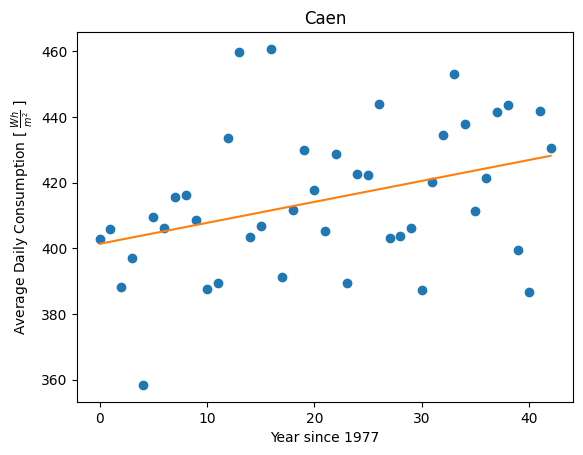

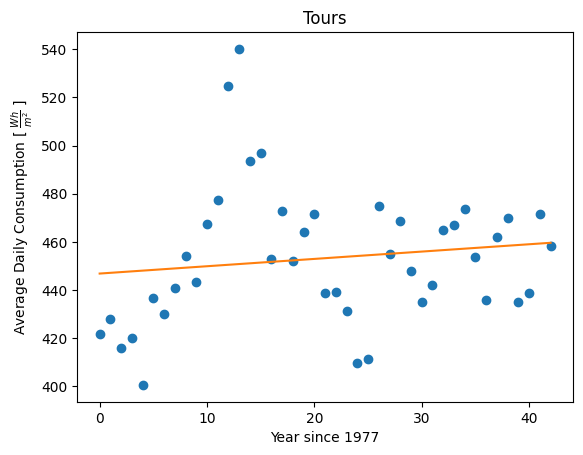

In [18]:
### New code because the previous one was producing an error

year_data_pd = time_to_year(data_pd)                # Cast the data to year date
Caen_av = [0]; Tours_av = [0]                       # Create two empty list for average
prev = 1977; count = 0; amount = [0]                # To help in my for loop
Start = (year_data_pd["DATE"] == "1977").idxmax()   # To find the start of our time aka 1977
Finish = (year_data_pd["DATE"] == "2020").idxmax()  # To find where to stop

for i in range(Start, Finish):
    if prev == int(year_data_pd["DATE"][i]):
        amount[count] += 1
        Caen_av[count] += C_caen[i] 
        Tours_av[count] += C_Tour[i]
    else:                
        Caen_av.append(C_caen[i])
        Tours_av.append(C_Tour[i])
        amount.append(1)
        
        count += 1
        prev = int(year_data_pd["DATE"][i])

amount = np.array(amount).astype(float)
Caen_av = np.array(Caen_av).astype(float)
Tours_av = np.array(Tours_av).astype(float)

Caen_av = Caen_av * (1/amount)
Tours_av = Tours_av * (1/amount)


### Finish Average

#print(Tours_av[35:], len(Tours_av)) # Proof it's working Yay


### B computing the linear regression X = (Year-1977)

### Y = A(Year-1977) + C
X = np.arange(0, 43)

coef_Caen = np.polyfit(X, Caen_av, 1)
coef_Tours = np.polyfit(X, Tours_av, 1)

fig, axe = plt.subplots()
axe.plot(X, Caen_av, "o")
axe.set_title("Caen")
axe.set_xlabel("Year since 1977")
axe.set_ylabel(r"Average Daily Consumption [ $ \frac{Wh}{m^2}$ ]")
axe.plot(X, coef_Caen[0]*X + coef_Caen[1])

fig, axe = plt.subplots()
axe.plot(X, Tours_av, "o")
axe.set_title("Tours")
axe.set_xlabel("Year since 1977")
axe.set_ylabel(r"Average Daily Consumption [ $ \frac{Wh}{m^2}$ ]")
axe.plot(X, coef_Tours[0]*X + coef_Tours[1])

#print(coef_Caen, coef_Tours)

---
3.2. You want to design a model to forecast the solar electric production for the next day (location Caen only). You will work with data over the period 1977 to 2019. 

Let us denote by C(t) the production on day 't'. The model that we want to fit is called autoregressive and is defined as follows:

$$C(t) = \sum_{k=1}^{10} a_k C(t-k) $$

This model is common in time-series analysis and predicts the production of the next day with the  recent observations.

a. Split the dataset into a training set (1977 to 2010 included) and a validation set (2011 to 2019 included).

b.	Estimate this model with statsmodels on the training set. 

c.	How would you judge the quality of the predictive model? (Analyze statistics reported by statsmodel)

d.	Compute the Mean Absolute Error (MAE) between predicted and real consumptions (on the training set).

In [ ]:
# -*- coding: utf-8 -*-
"""
No need to re-import data in jupyter or to re-do already existing variable 
"""

### answer to a
start_train = (year_data_pd["DATE"] == "1977").idxmax() # We find the start index of the training data
end_train   = (year_data_pd["DATE"] == "2011").idxmax() #  *      *   end   index  *               *

start_val = (year_data_pd["DATE"] == "2011").idxmax() # We find the start index of the validation data
end_val   = (year_data_pd["DATE"] == "2020").idxmax() #  *      *   end   index  *                 *

training_set = C_caen[start_train: end_train]
validation_set = C_caen[start_val: end_val]

training_set = np.array(training_set)
validation_set = np.array(validation_set)

### Code below has issues

training_X = np.arange(1977, 2011)
Xm = sm.tools.tools.add_constant(training_X)
print(len(training_set), len(training_X))
results = sm.OLS(training_set[:,2], Xm).fit()
print(results.summary())

# answer to d
training_pred = results.predict(Xm)
error = mae(training_set, training_pred)
print(f"Mean Absolute Error (MAE) between predicted and real consumptions: {error}")

<<<<<<< local


NameError: name 'year_data_pd' is not defined

12296 34


IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

>>>>>>> remote


---
3.3. Use this model on the test set to forecast the electric daily production.

a. Compare on a graph, the forecast to  real consumptions on the given period. 

b. Plot the errors of prediction. Are they acceptable?

c. Compute the MAE on the test set and the $R^2$. Is the forecast reliable?

In [5]:
# code here

validation_X = np.arange(2011, 2020)
Xm_val = sm.add_constant(validation_X)
results = sm.OLS(training_set[:,2], Xm).fit()
validation_pred = results.predict(Xm_val)

plt.figure(figsize=(10, 5))
plt.plot(validation_X, validation_set, label="Real Consumption")
plt.plot(validation_X, validation_pred, label="Predicted Consumption")
plt.xlabel("Years")
plt.ylabel("Energy (Wh/m^2)")
plt.title("Comparison of Forecast vs. Real Consumption (Validation Set)")
plt.legend()
plt.show()



# answer to b

validation_errors = validation_set - validation_pred

plt.figure(figsize=(10, 5))
plt.plot(validation_X, validation_errors, label="Prediction Errors")
plt.axhline(0, color='r', linestyle='--', label="Zero Error")
plt.xlabel("Years")
plt.ylabel("Error (Wh/m^2)")
plt.title("Prediction Errors (Validation Set)")
plt.legend()
plt.show()


# answer to c

mae_validation = mae(validation_set, validation_pred)
print(f"Mean Absolute Error (MAE) on the validation set: {mae_validation}")

residuals = validation_set - validation_pred
sse = np.sum(residuals ** 2)
sst = np.sum((validation_set - np.mean(validation_set)) ** 2)
r_squared = 1 - (sse / sst)
print(f"R^2 on the validation set: {r_squared}")



NameError: name 'np' is not defined